<a href="https://colab.research.google.com/github/kimayeon-hub/DeepLearning1/blob/main/Week5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝(다층신경망)을 사용하는 타이타닉데이터 분석과 하이퍼 파라미터 조정의 기초
- 딥러닝을 수행할 때, 학습이 잘 되었는지 잘 안 되었는지 판단을 해서,
- 딥러닝 모델 구조를 조금씩 변경시켜야 함

- 배울 내용
  1. **딥러닝 모델 구조**를 어떤 식으로 **변경**시킬 수 있을지
  2. **결과**를 보고 좋다, 나쁘다를 어떻게 **판별**할 수 있는지
    - validation accuracy가 잘 나와야 함

- `참고` 런타임 유형을 GPU를 사용하면 학습 속도가 더 빠름

## 딥러닝 중에서도 완전연결층을 사용하는 다층신경망을 사용
- 타이타닉 데이터`(Week3-3 > train.csv, test.csv)`가 정형 데이터이기 때문
- `정형 데이터`: 테이블 형태로 나타나는 데이터
  > 정형 데이터의 경우, <br>
  > 딥러닝에서 흔히 사용하는 합성곱 신경망, 순환 신경망을 사용하기 어려움

In [1]:
# 넘파이 및 판다스 라이브러리
import numpy as np
import pandas as pd

# 케라스 라이브러리
from keras.models import Sequential
from keras import optimizers
from keras import layers
from keras.utils import to_categorical

In [3]:
# 데이터 읽어오기
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
# 전처리 함수
def preprocessing(data):
  data_np = np.zeros([data.shape[0], 8])

  # 성별 one-hot-encoding
  sex_num = np.zeros(data_np.shape[0])
  sex_num[data['Sex'] == 'female'] = 1
  data_np[:, :2] = to_categorical(sex_num)

  # Pclass one-hot-encoding
  data_np[:, 2:5] = to_categorical(data['Pclass'].to_numpy() - 1)

  # 나이, 형제 자매 수, 부모 자녀 수  one-hot-encoding
  data_np[:, 5] = data['Age'] / 80
  data_np[:, 6] = data['SibSp'] / 10
  data_np[:, 7] = data['Parch'] / 10

  # 나이 결측치 제거
  data_np[np.isnan(data_np)] = 30 / 80  # 적당한 갓으로 impute

  return data_np

In [5]:
# 학습 데이터와 테스트 데이터 전처리
data_train_np = preprocessing(data_train)
data_test_np = preprocessing(data_test)

In [6]:
# 출력 데이터 전처리
data_train_np_y = to_categorical(data_train['Survived'])

# 결과를 하나의 값으로 나타내기 0, 1로 나타내기
# data_train_np_y = np.array(data_train['Survived'])

In [32]:
# 모델 만들기
model = Sequential()
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))  # model.add(layers.Dense(units=1, activation='sigmoid')) (0, 1로 나타내야 되므로 노드는 1개, 활성화 함수는 sigmoid를 사용)

In [33]:
# optimizer 설정, optimizer 사용해서 컴파일
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 결과가 하나만 나오는 경우
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# categorical_crossentropy는 원 핫 인코딩 방식임

In [ ]:
# 학습 시키기
hist = model.fit(data_train_np, data_train_np_y, epochs=400, batch_size=16, validation_split=0.2)

Epoch 1/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6385 - loss: 0.6345 - val_accuracy: 0.8156 - val_loss: 0.5047
Epoch 2/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7804 - loss: 0.4988 - val_accuracy: 0.8045 - val_loss: 0.4428
Epoch 3/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7843 - loss: 0.4549 - val_accuracy: 0.8045 - val_loss: 0.4287
Epoch 4/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031 - loss: 0.4581 - val_accuracy: 0.8212 - val_loss: 0.4243
Epoch 5/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4426 - val_accuracy: 0.8045 - val_loss: 0.4213
Epoch 6/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7815 - loss: 0.4897 - val_accuracy: 0.8045 - val_loss: 0.4189
Epoch 7/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7791 - loss: 0.4738 - val_accuracy: 0.8268 - val_loss: 0.4169
Epoch 8/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7781 - loss: 0.4761 - val_accuracy: 0.8324 - 

In [10]:
# 그래프로 그려서 학습 정확도 확인하기
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize=(15,10))
  loss_ax = plt.gca()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='lower left')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  loss_ax.legend(loc='upper left')

  plt.show()

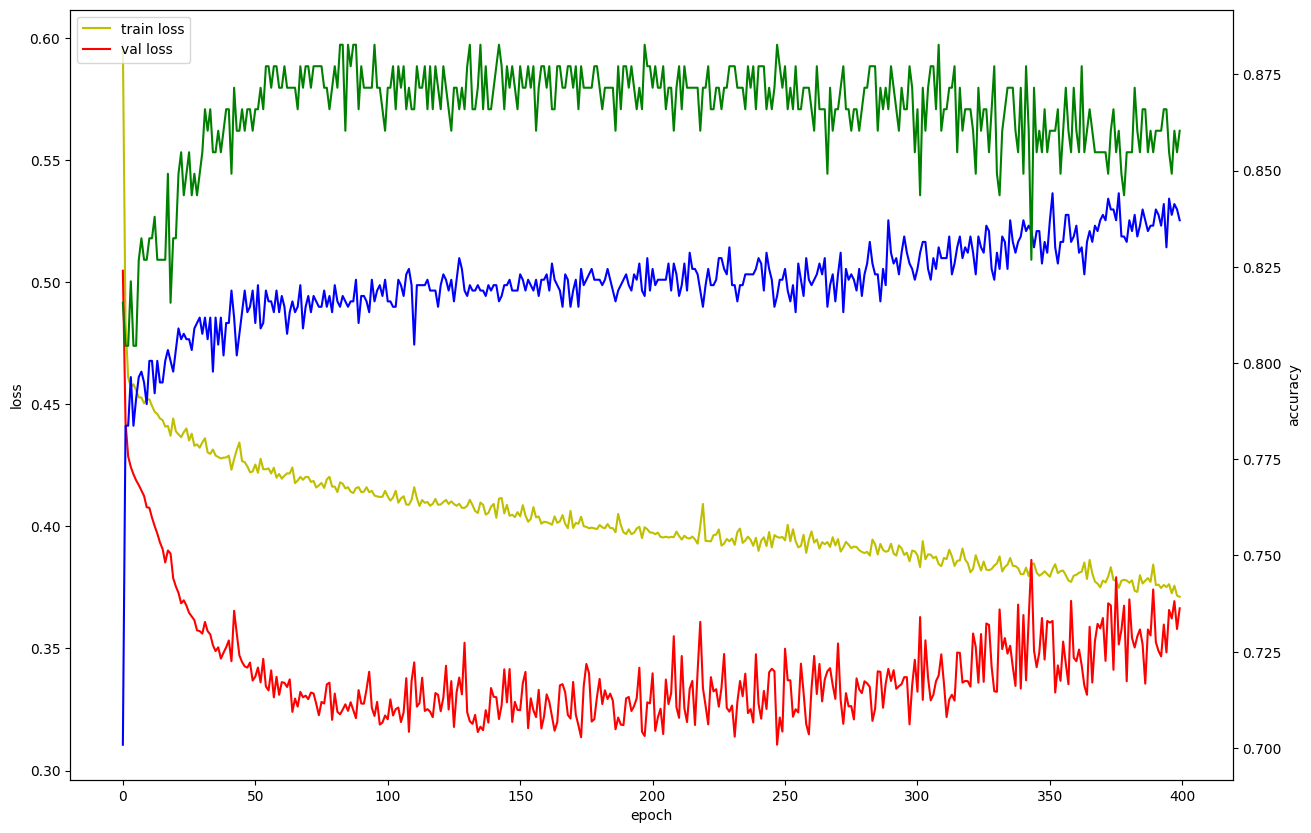

In [ ]:
drawHistory(hist)

### [참고] 보통 validation accuracy를 보고 early stoping을 거는 경우가 있음
- early stoping
  - (여러 가지 방법이 있지만)
  - 보통 가장 낮게 나온 validation loss를 기준으로 20~30 epoch 사이에서 더 나은 validation이 나오지 않으면 거기서 멈추는 방법
  - 혹은 그 앞에서 가장 낮은 loss가 나왔다면 그 위치로 돌아가서(roll back) 그 것을 사용하는 방법

In [ ]:
# prediction
o = model.predict(data_test_np)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
o = np.argmax(o, -1)

# 학습 결과가 하나만 나오는 경우
# o = np.round(o).astype('int32')  반올림을 해주는 것

In [ ]:
answer = np.zeros([data_test.shape[0], 2])
answer[:, 0] = data_test['PassengerId']
answer[:, 1] = o  # asnwer[:, 1] = o[:, 0]

In [ ]:
# answer을 dataframe으로 바꾸기
df_answer = pd.DataFrame(answer)
df_answer.columns = ['PassengerId', 'Survived']
df_answer = df_answer.astype(int)
df_answer.to_csv('answer2.csv', index=False)

## 그래프를 보고 모델을 어떻게 수정할 것인지 판단하기

### 주의
- 모델을 새로 학습시킬 때는 **모델을 새로 만들어**서 해야 함
- 새로 학습을 시키는 데 처음부터 학습 정확도가 0.8 이렇게 나오면, 이전 모델에 추가로 학습을 시키는 것이므로 잘 못 된 것임

### overfitting
- 학습 정확도는 올라가는데 validation 정확도는 떨어지는 것
> 그래프를 보면 250 epoch 쯤에서 학습을 끝내는 것이 좋을 수도 있다는 것을 알 수 있음

In [9]:
# 학습 시키기
hist = model.fit(data_train_np, data_train_np_y, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.6269 - loss: 0.6533 - val_accuracy: 0.8212 - val_loss: 0.4924
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7767 - loss: 0.5174 - val_accuracy: 0.8045 - val_loss: 0.4330
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7725 - loss: 0.4694 - val_accuracy: 0.8212 - val_loss: 0.4186
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7929 - loss: 0.4581 - val_accuracy: 0.8156 - val_loss: 0.4248
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7743 - loss: 0.4661 - val_accuracy: 0.8212 - val_loss: 0.4138
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7901 - loss: 0.4556 - val_accuracy: 0.8380 - val_loss: 0.4083
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7797 - loss: 0.4964 - val_accuracy: 0.8268 - val_loss: 0.4091
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.4148 - val_accuracy: 0.8268 - 

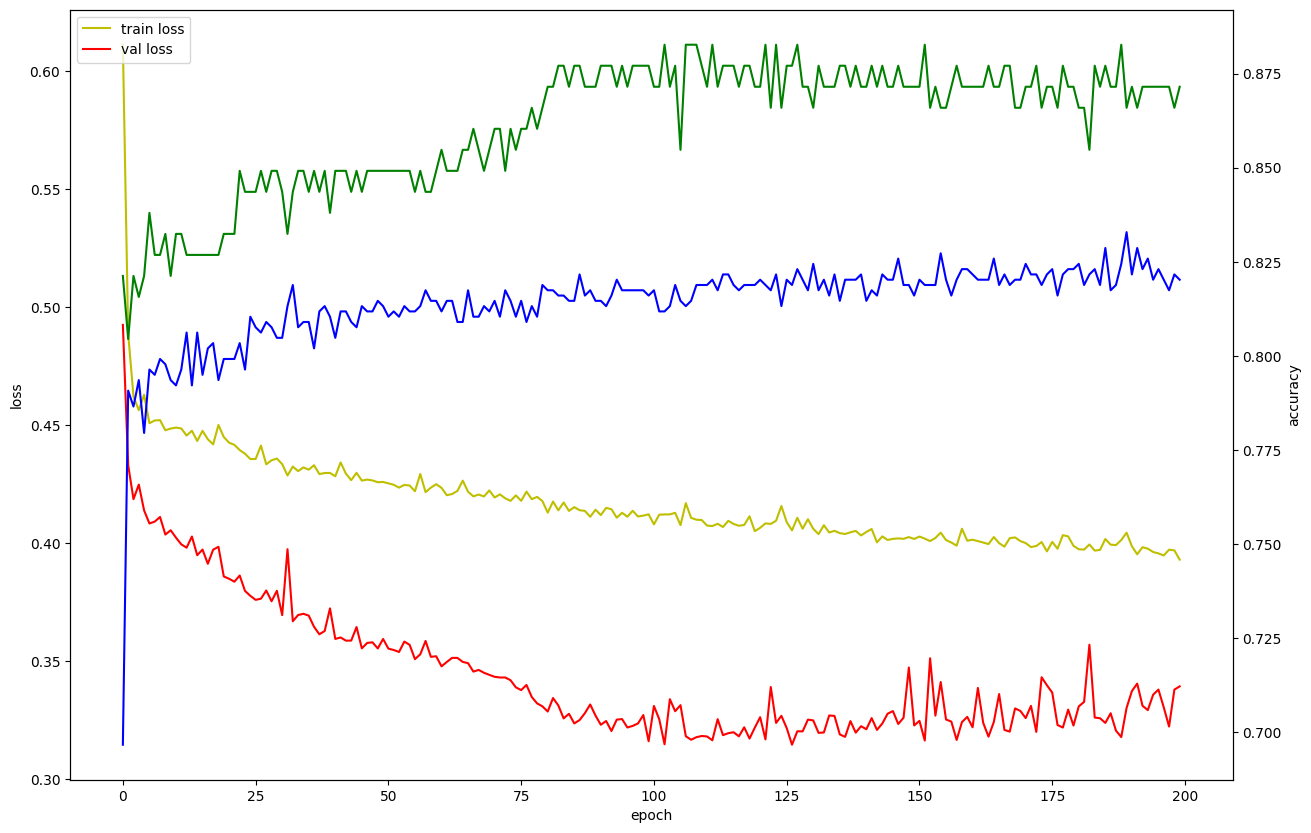

In [11]:
# 그래프로 그리기
drawHistory(hist)

In [12]:
# prediction
o = model.predict(data_test_np)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [13]:
o = np.argmax(o, -1)

In [14]:
answer = np.zeros([data_test.shape[0], 2])
answer[:, 0] = data_test['PassengerId']
answer[:, 1] = o

In [16]:
df_answer = pd.DataFrame(answer)
df_answer.columns = ['PassengerId', 'Survived']
df_answer = df_answer.astype(int)
df_answer.to_csv('answer4.csv', index=False)

### Dense layer의 unit 수, Dense layer의 개수 조정



In [17]:
# Dense layer 하나 줄이기
model = Sequential()
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))

In [18]:
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
hist = model.fit(data_train_np, data_train_np_y, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7317 - loss: 0.6476 - val_accuracy: 0.7598 - val_loss: 0.5426
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7254 - loss: 0.5535 - val_accuracy: 0.8324 - val_loss: 0.4510
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8355 - loss: 0.4655 - val_accuracy: 0.8324 - val_loss: 0.4142
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8302 - loss: 0.4233 - val_accuracy: 0.8268 - val_loss: 0.4100
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8026 - loss: 0.4428 - val_accuracy: 0.8268 - val_loss: 0.4094
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7919 - loss: 0.4562 - val_accuracy: 0.8324 - val_loss: 0.4018
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8075 - loss: 0.4562 - val_accuracy: 0.8324 - val_loss: 0.3994
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8093 - loss: 0.4287 - val_accuracy: 0.8324 - 

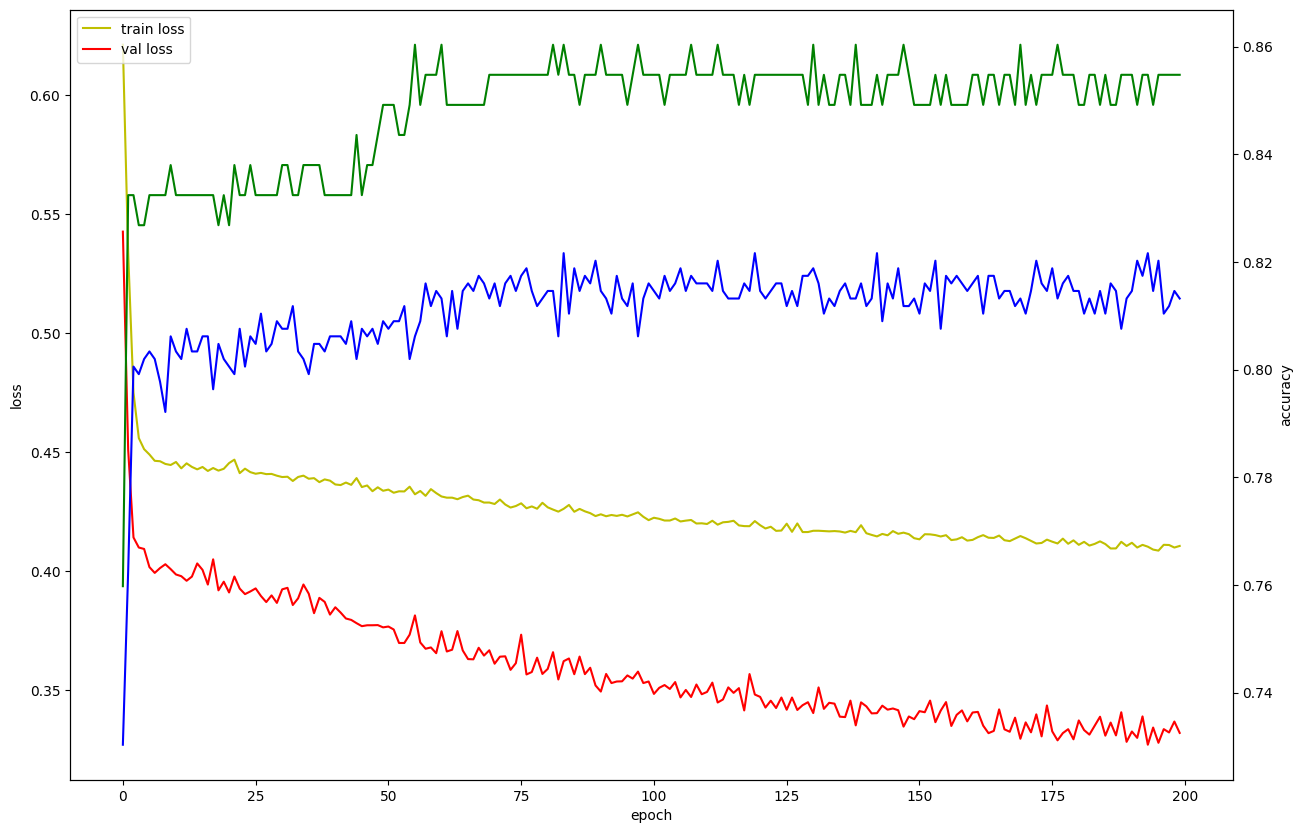

In [20]:
drawHistory(hist)

In [23]:
o = model.predict(data_test_np)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [24]:
o = np.argmax(o, -1)

In [25]:
answer = np.zeros([data_test.shape[0], 2])
answer[:, 0] = data_test['PassengerId']
answer[:, 1] = o

In [26]:
df_answer = pd.DataFrame(answer)
df_answer.columns = ['PassengerId', 'Survived']
df_answer = df_answer.astype(int)
df_answer.to_csv('answer5.csv', index=False)

### 전처리 부분을 바꾸기
- 성별을 one-hot-encoding을 해서 넣지 말고 그대로 0, 1로 넣어보기
- Sibsp와 Parch 합치기
> 원래는 EDA로 데이터 분석을 하고 하는 것이 맞음

> 데이터가 단순해지면 모델 예측하기가 쉬워짐

In [30]:
# 전처리 함수
def preprocessing(data):
  data_np = np.zeros([data.shape[0], 6])

  # 성별
  sex_num = np.zeros(data_np.shape[0])
  sex_num[data['Sex'] == 'female'] = 1
  data_np[:, 0] = sex_num

  # Pclass one-hot-encoding
  data_np[:, 1:4] = to_categorical(data['Pclass'].to_numpy() - 1)

  # 나이, 형제 자매 수, 부모 자녀 수  one-hot-encoding
  data_np[:, 4] = data['Age'] / 80
  data_np[:, 5] = (data['SibSp'] + data['Parch']) / 10

  # 나이 결측치 제거
  data_np[np.isnan(data_np)] = 30 / 80  # 적당한 값으로 impute

  return data_np

In [31]:
data_train_np = preprocessing(data_train)
data_test_np = preprocessing(data_test)

In [48]:
model = Sequential()
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))

In [49]:
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
hist = model.fit(data_train_np, data_train_np_y, epochs=200, batch_size=16, validation_split=0.2)

Epoch 1/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6669 - loss: 0.6786 - val_accuracy: 0.8156 - val_loss: 0.5999
Epoch 2/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7627 - loss: 0.5754 - val_accuracy: 0.8156 - val_loss: 0.4782
Epoch 3/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7894 - loss: 0.4820 - val_accuracy: 0.8156 - val_loss: 0.4213
Epoch 4/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8049 - loss: 0.4323 - val_accuracy: 0.8324 - val_loss: 0.4032
Epoch 5/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8123 - loss: 0.4354 - val_accuracy: 0.8268 - val_loss: 0.4120
Epoch 6/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8058 - loss: 0.4379 - val_accuracy: 0.8268 - val_loss: 0.4048
Epoch 7/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7901 - loss: 0.4349 - val_accuracy: 0.8212 - val_loss: 0.4111
Epoch 8/200
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.4500 - val_accuracy: 0.8324 - 

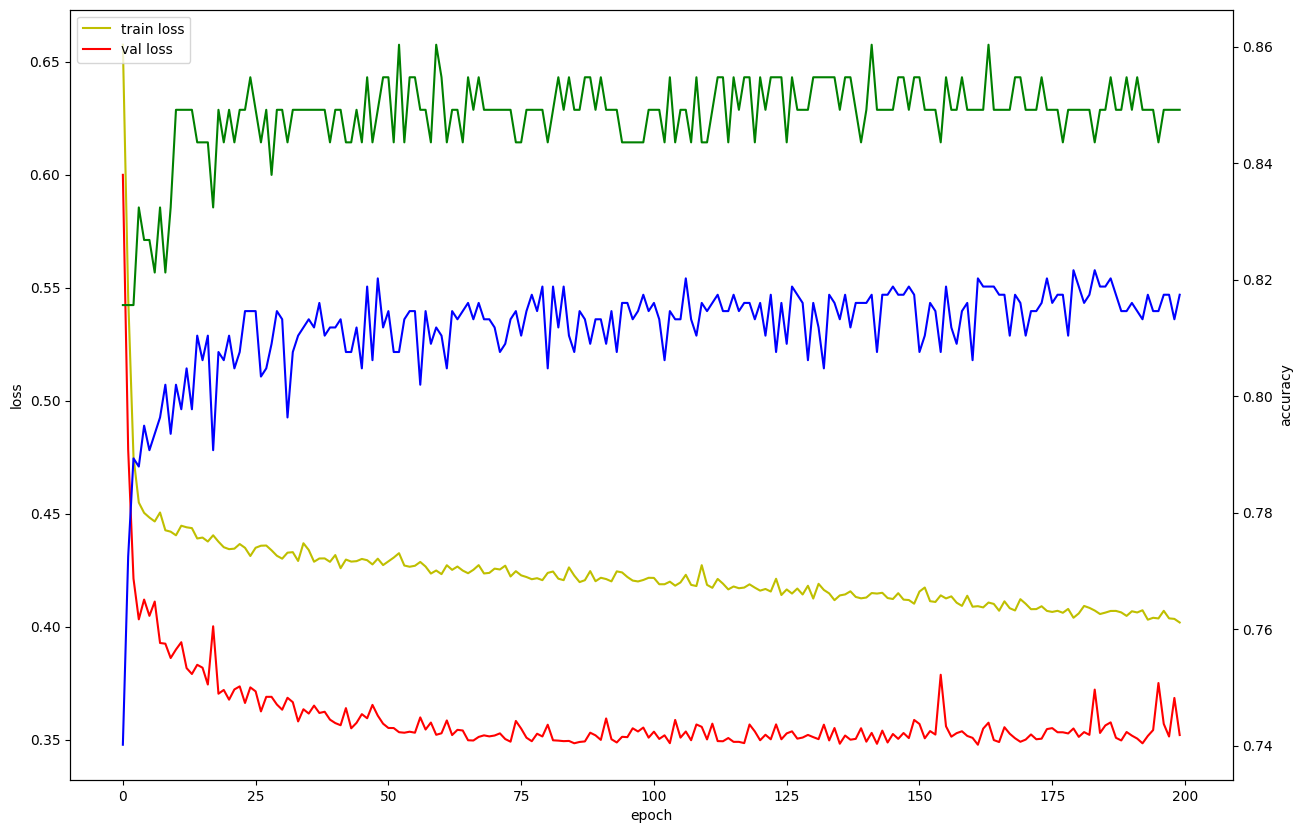

In [41]:
drawHistory(hist)

In [42]:
o = model.predict(data_test_np)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [43]:
o = np.argmax(o, -1)

In [44]:
answer = np.zeros([data_test.shape[0], 2])
answer[:, 0] = data_test['PassengerId']
answer[:, 1] = o

In [47]:
df_answer = pd.DataFrame(answer)
df_answer.columns = ['PassengerId', 'Survived']
df_answer = df_answer.astype(int)
df_answer.to_csv('answer6.csv', index=False)

> 0.77511 -> 0.78229 <br>
> epoch 늘려보기

In [50]:
hist = model.fit(data_train_np, data_train_np_y, epochs=400, batch_size=16, validation_split=0.2)

Epoch 1/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6331 - loss: 0.6642 - val_accuracy: 0.8156 - val_loss: 0.5323
Epoch 2/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7740 - loss: 0.5227 - val_accuracy: 0.8324 - val_loss: 0.4197
Epoch 3/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7763 - loss: 0.4512 - val_accuracy: 0.8380 - val_loss: 0.4146
Epoch 4/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8141 - loss: 0.4293 - val_accuracy: 0.8268 - val_loss: 0.4107
Epoch 5/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7837 - loss: 0.4666 - val_accuracy: 0.8268 - val_loss: 0.4025
Epoch 6/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8077 - loss: 0.4429 - val_accuracy: 0.8324 - val_loss: 0.3986
Epoch 7/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7869 - loss: 0.4447 - val_accuracy: 0.8324 - val_loss: 0.3970
Epoch 8/400
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8192 - loss: 0.4244 - val_accuracy: 0.8324 - 

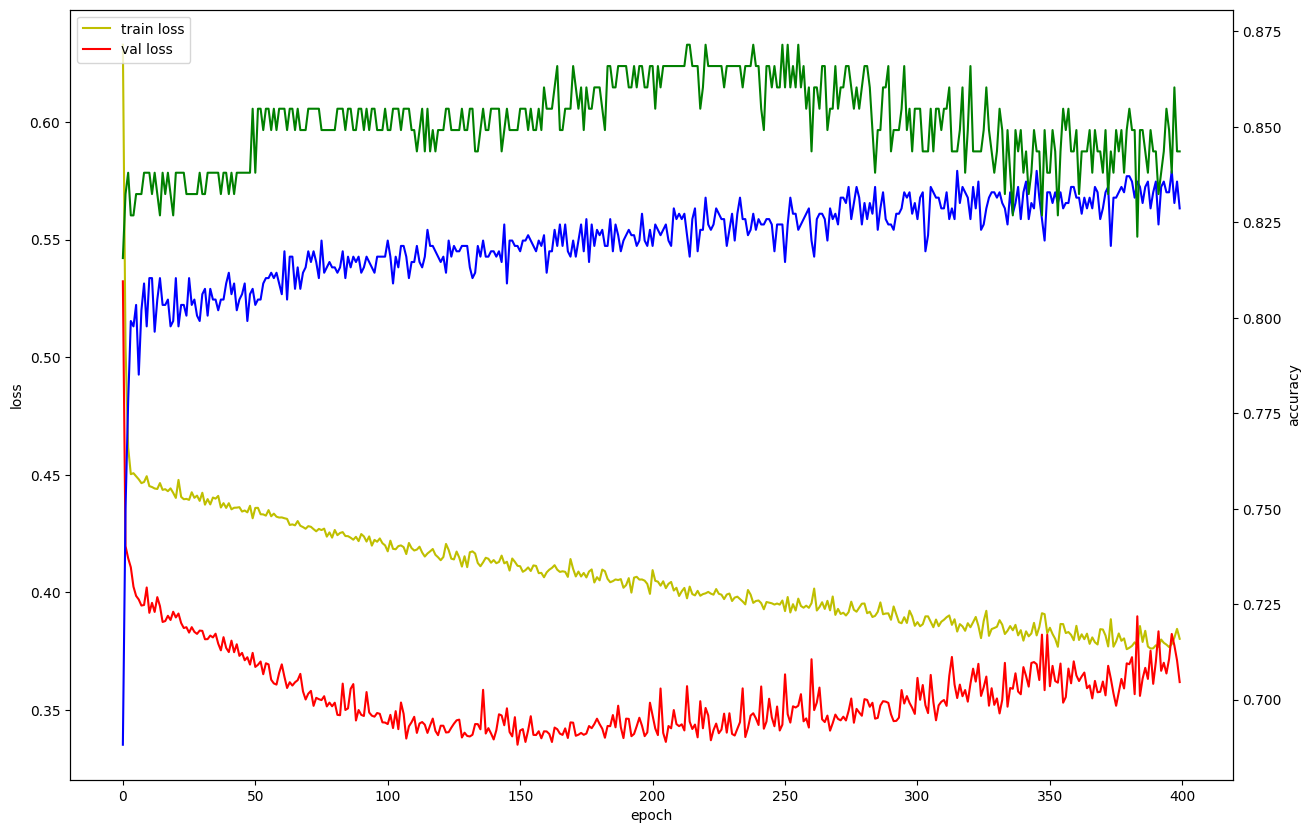

In [51]:
drawHistory(hist)